# Exercise 4

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [21]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    finalNumber1: int
    finalNumber2: int

In [31]:
def adder(state: AgentState) -> AgentState:
    """This node adds two numbers."""
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts two numbers."""
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def adder2(state: AgentState) -> AgentState:
    """This node adds two numbers."""
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtractor2(state: AgentState) -> AgentState:
    """This node subtracts two numbers."""
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node decides which operation to perform based on the operation field."""
    if state["operation1"] == "+":
        return "addition_operation"
    elif state["operation1"] == "-":
        return "subtraction_operation"

def decide_next_node2(state: AgentState) -> AgentState:
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [32]:
graph = StateGraph(AgentState)
graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("router1",lambda state: state)#passthrough function
graph.add_node("router2",lambda state: state)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node,
    {
        #"Edge": "node"
        "addition_operation" : "add_node",
        "subtraction_operation" : "subtract_node"
    }
)

graph.add_node("add_node2",adder2)
graph.add_node("subtract_node2",subtractor2)

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        #"Edge": "node"
        "addition_operation2" : "add_node2",
        "subtraction_operation2" : "subtract_node2"
    }
)


graph.add_edge("add_node","router2")
graph.add_edge("subtract_node","router2")
graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)
app = graph.compile()


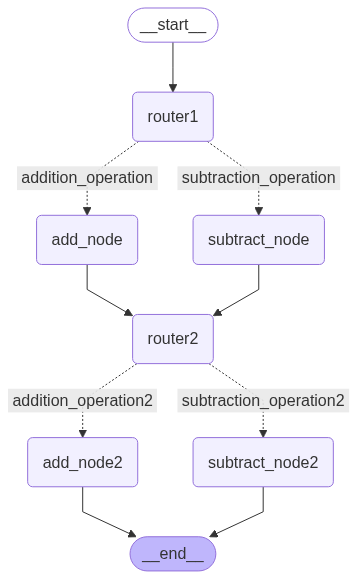

In [33]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
initial_state = AgentState(number1 = 10, operation1 = "-", number2 = 5, number3 = 7,number4 = 2, operation2 = "+")
print(app.invoke(initial_state))

{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'operation1': '-', 'operation2': '+', 'finalNumber1': 5, 'finalNumber2': 9}
